<a href="https://colab.research.google.com/github/lungnahahd/Tensorflow_Prac/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression 구현

**Gradient Descent**

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1) # X는 0 ~ 2 사이의 랜덤 숫자로 (100,1) shape를 가지는 데이터 생성
X_b = np.c_[np.ones((100,1)), X] # 열 이어 붙이기 ex) [[100],[7]] 과 [[20],[4]]를 이어붙이면, [[100,20],[7,4]] 생성
X_b

array([[1.        , 0.30833851],
       [1.        , 0.33724125],
       [1.        , 1.47255187],
       [1.        , 0.31180597],
       [1.        , 1.86572313],
       [1.        , 1.70757117],
       [1.        , 0.69609377],
       [1.        , 1.41191734],
       [1.        , 0.88026345],
       [1.        , 0.64031131],
       [1.        , 1.47295807],
       [1.        , 0.20497706],
       [1.        , 0.73932907],
       [1.        , 0.23040151],
       [1.        , 0.76209611],
       [1.        , 1.72557162],
       [1.        , 1.85210363],
       [1.        , 0.55307064],
       [1.        , 0.82459366],
       [1.        , 1.00433389],
       [1.        , 1.18654885],
       [1.        , 0.50506463],
       [1.        , 0.97702046],
       [1.        , 0.65648459],
       [1.        , 0.67982661],
       [1.        , 1.67925936],
       [1.        , 0.67802212],
       [1.        , 0.50092909],
       [1.        , 0.18870147],
       [1.        , 1.83349783],
       [1.

In [ ]:
theta = np.array([[4],[3]]) # bias와 x에 가해지는 초기 weight(가중치)
y = X_b.dot(theta) + np.random.randn(100,1) # y 정답 값을 생성하기 

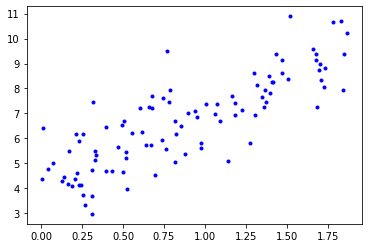

In [ ]:
import matplotlib.pyplot as plt

# 정답에 해당하는 값들을 그래프로 표현
plt.plot(X,y,"b.")
plt.show() 

In [ ]:
eta = 0.1  # Learnig Rate를 지정
n_iterations = 1000 # 학습을 반복할 횟수를 지정
m = 100 # Sample(X)의 개수

theta = np.random.randn(2,1)  # 여기 theta는 학습을 테스트 하기 위해 임의로 지정한 것

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 학습 중간중간 구해지는 기울기
    theta = theta - eta * gradients # 기울기와 learning rate를 이용해서 theta(weight)를 최신화

theta # 학습을 1000번 완료하고 수정된 weight

array([[4.28399301],
       [2.72970137]])

**실제로 Batch Gradient 진행해보기**

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 지정한 X 값에 1로 초기화된 bias를 추가
color = ["b","g","r","c"]
line = ["-","--", "-.",":"]
np.random.seed(42) # 랜덤한 weight를 고정하는 부분
initial_theta = np.random.randn(2,1) # 초기 학습 전 weight 지정

#
def plot_gradient_descent(eta):
    theta = initial_theta
    theta_path = []
    m = len(X_b)
    plt.plot(X,y,"b.") # 정답 값을 점으로 표시
    n_iterations = 1000 # 학습할 횟수

    for iteration in range(n_iterations):
      # if 절 안쪽은 단순히 학습되는 과정을 그래프로 그리는 과정(초기 16개까지만 그리기)
      if iteration < len(color)*len(line):
        y_new_predict = X_new_b.dot(theta) # 현재 weight 기준 y의 예측값
        style = color[iteration//len(color)] + line[iteration%len(line)]
        plt.plot(X_new,y_new_predict,style)
      
      # 이 부분은 실질적인 학습이 이루어지는 부분
      gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 기울기를 구하는 부분
      theta = theta - eta * gradients # 기울기를 활용해서 weight를 수정하는 부분
    plt.title(r"$eta = {}$".format(eta), fontsize=16)

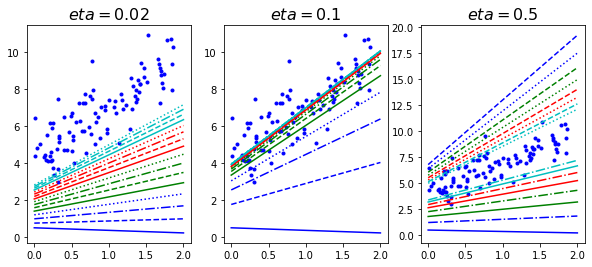

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(0.02)
plt.subplot(132)
plot_gradient_descent(0.1)
plt.subplot(133)
plot_gradient_descent(0.5)
plt.show()

**Early Stopping 추가**

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 지정한 X 값에 1로 초기화된 bias를 추가
color = ["b","g","r","c"]
line = ["-","--", "-.",":"]
np.random.seed(42) # 랜덤한 weight를 고정하는 부분
initial_theta = np.random.randn(2,1) # 초기 학습 전 weight 지정


def plot_gradient_descent(eta):
    theta = initial_theta
    theta_path = []
    m = len(X_b)
    plt.plot(X,y,"b.") # 정답 값을 점으로 표시
    n_iterations = 1000 # 학습할 횟수
    
    min_mse = 10000 # 꼭 10000이 아니더라도 early stopping에서 이용하기 위해 큰 수를 입력!!!!

    for iteration in range(n_iterations):
      # if 절 안쪽은 단순히 학습되는 과정을 그래프로 그리는 과정(초기 16개까지만 그리기)
      if iteration < len(color)*len(line):
        y_new_predict = X_new_b.dot(theta) # 현재 weight 기준 y의 예측값
        style = color[iteration//len(color)] + line[iteration%len(line)]
        plt.plot(X_new,y_new_predict,style)
      y_predict = X_b.dot(theta) # 현재 weight 기준 예측값
      err = y_predict - y # 예측값과 실제 값과의 차이
      
      # 이 부분은 실질적인 학습이 이루어지는 부분
      gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 기울기를 구하는 부분
      
      # Early Stopping이 이루어지는 코드 !!
      mse = 1/m * err.T.dot(err) # err의 제곱을 행렬의 제곱으로 표현
      if mse < min_mse:
        min_mse = mse
      else:
        print(f'i={iteration} early stopping!! w/o mse={mse}')
        break # 학습 종료
      theta = theta - eta * gradients
    print(f'theta={theta} with = mse={min_mse}')
    plt.title(r"$eta = {}$".format(eta),fontsize=16)      

theta=[[4.28291407]
 [2.7307428 ]] with = mse=[[1.03225873]]
i=482 early stopping!! w/o mse=[[1.03225837]]
theta=[[4.28399286]
 [2.72970151]] with = mse=[[1.03225837]]
i=199 early stopping!! w/o mse=[[1.03225837]]
theta=[[4.28399302]
 [2.72970138]] with = mse=[[1.03225837]]


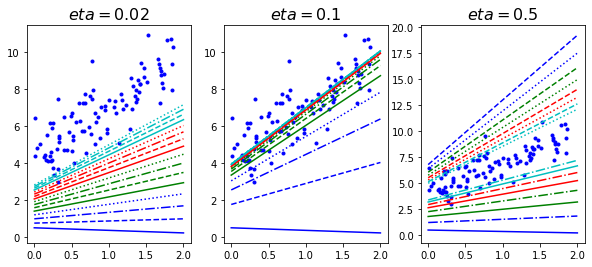

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(0.02)
plt.subplot(132)
plot_gradient_descent(0.1)
plt.subplot(133)
plot_gradient_descent(0.5)
plt.show()

**Feature Scaling & L2 Regularization**

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 지정한 X 값에 1로 초기화된 bias를 추가
color = ["b","g","r","c"]
line = ["-","--", "-.",":"]

# min-max를 활용해서 Feature Scaling을 하는 코드 (X에만 하고 Y에는 하지 않는 것 잊지 말기, 추가로 bias를 제외하고 진행!)
X = X / 2
X_new = X_new / 2

def plot_gradient_descent(eta):
    theta = initial_theta
    theta_path = []
    m = len(X_b)
    plt.plot(X,y,"b.") # 정답 값을 점으로 표시
    n_iterations = 1000 # 학습할 횟수
    min_mse = 10000 # 꼭 10000이 아니더라도 early stopping에서 이용하기 위해 큰 수를 입력!!!!

    # L2를 위한 계수!!
    alpha = 1e-4

    for iteration in range(n_iterations):
      # if 절 안쪽은 단순히 학습되는 과정을 그래프로 그리는 과정(초기 16개까지만 그리기)
      if iteration < len(color)*len(line):
        y_new_predict = X_new_b.dot(theta) # 현재 weight 기준 y의 예측값
        style = color[iteration//len(color)] + line[iteration%len(line)]
        plt.plot(X_new,y_new_predict,style)
      y_predict = X_b.dot(theta) # 현재 weight 기준 예측값
      err = y_predict - y # 예측값과 실제 값과의 차이
      
      # 이 부분은 실질적인 학습이 이루어지는 부분
      # 기울기를 구하는 부분 (여기에 L2 정규화를 적용)
      # weight(theta)를 이용할 때, [1:]을 이용해서 bias 부분은 제외해주는 것 주의하기
      gradients = 2/m * X_b.T.dot(err) + 2*alpha*np.r_[[[0]], theta[1:]]
      mse = 1/m * err.T.dot(err) + alpha*theta[1:].T.dot(theta[1:])
      
      # Early Stopping이 이루어지는 코드 !!
      mse = 1/m * err.T.dot(err) # err의 제곱을 행렬의 제곱으로 표현
      if mse < min_mse:
        min_mse = mse
      else:
        print(f'i={iteration} early stopping!! w/o mse={mse}')
        break # 학습 종료
      theta = theta - eta * gradients
    print(f'theta={theta} with = mse={min_mse}')
    plt.title(r"$eta = {}$".format(eta),fontsize=16)      

theta=[[4.28372619]
 [2.72981581]] with = mse=[[1.03225841]]
i=205 early stopping!! w/o mse=[[1.03225839]]
theta=[[4.28395214]
 [2.72959773]] with = mse=[[1.03225839]]
i=82 early stopping!! w/o mse=[[1.03226465]]
theta=[[4.28364027]
 [2.72756882]] with = mse=[[1.03226441]]


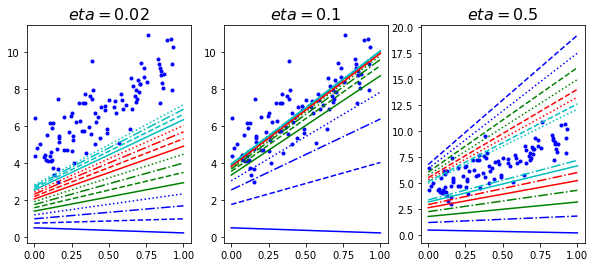

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(0.02)
plt.subplot(132)
plot_gradient_descent(0.1)
plt.subplot(133)
plot_gradient_descent(0.5)
plt.show()

**Varing Learning Rate**

해당 과정은 Learning Rate를 계속적으로 바꿔주면서 학습을 확인해보는 것!!

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 지정한 X 값에 1로 초기화된 bias를 추가
color = ["b","g","r","c"]
line = ["-","--", "-.",":"]
# min-max를 활용해서 Feature Scaling을 하는 코드 (X에만 하고 Y에는 하지 않는 것 잊지 말기, 추가로 bias를 제외하고 진행!)
X = X / 2
X_new = X_new / 2

# Varing Learning Rate를 구현하는 부분
t0, t1 = m*1.5 , m # 초기 learnig rate 관련 Hyperparameters
learning_schedule = lambda t: t0/(t+t1) # learning rate를 반복되는 학습 중간중간 바꾸기 위해 작성한 함수

def plot_gradient_descent(eta):
    theta = initial_theta
    theta_path = []
    m = len(X_b)
    plt.plot(X,y,"b.") # 정답 값을 점으로 표시
    n_iterations = 1000 # 학습할 횟수
    min_mse = 10000 # 꼭 10000이 아니더라도 early stopping에서 이용하기 위해 큰 수를 입력!!!!
    # L2를 위한 계수!!
    alpha = 1e-4

    for iteration in range(n_iterations):
      # if 절 안쪽은 단순히 학습되는 과정을 그래프로 그리는 과정(초기 16개까지만 그리기)
      if iteration < len(color)*len(line):
        y_new_predict = X_new_b.dot(theta) # 현재 weight 기준 y의 예측값
        style = color[iteration//len(color)] + line[iteration%len(line)]
        plt.plot(X_new,y_new_predict,style)
      y_predict = X_b.dot(theta) # 현재 weight 기준 예측값 
      err = y_predict - y # 예측값과 실제 값과의 차이

      # 이 부분은 실질적인 학습이 이루어지는 부분
      # 기울기를 구하는 부분 (여기에 L2 정규화를 적용)
      # weight(theta)를 이용할 때, [1:]을 이용해서 bias 부분은 제외해주는 것 주의하기
      gradients = 2/m * X_b.T.dot(err) + 2*alpha*np.r_[[[0]], theta[1:]]
      mse = 1/m * err.T.dot(err) + alpha*theta[1:].T.dot(theta[1:])
      # Early Stopping이 이루어지는 코드 !!
      mse = 1/m * err.T.dot(err) # err의 제곱을 행렬의 제곱으로 표현
      if mse < min_mse:
        min_mse = mse
      else:
        print(f'i={iteration} early stopping!! w/o mse={mse}')
        break # 학습 종료

      # Learning Rate를 매 학습마다 변화를 주기 위해 작성한 코드
      eta = learning_schedule(iteration)
      
      theta = theta - eta * gradients
    print(f'theta={theta} with = mse={min_mse}')
    plt.title(r"$eta = {}$".format(eta),fontsize=16)   

i=1 early stopping!! w/o mse=[[938.60546174]]
theta=[[19.39670263]
 [18.9537312 ]] with = mse=[[43.14379019]]
i=1 early stopping!! w/o mse=[[938.60546174]]
theta=[[19.39670263]
 [18.9537312 ]] with = mse=[[43.14379019]]
i=1 early stopping!! w/o mse=[[938.60546174]]
theta=[[19.39670263]
 [18.9537312 ]] with = mse=[[43.14379019]]


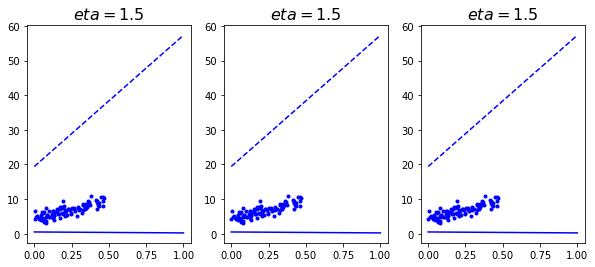

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(0.02)
plt.subplot(132)
plot_gradient_descent(0.1)
plt.subplot(133)
plot_gradient_descent(0.5)
plt.show()

**Stochastic Gradient Descent**

m 개의 sample 중 1개를 선택하면서 학습 진행

epoch=2 early stopping!! w/o mse=[[1.04924864]] min_mse=[[1.04514463]]


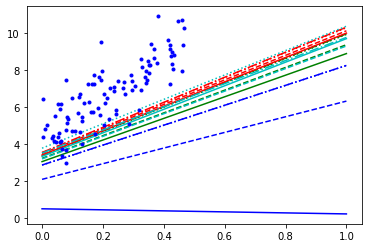

In [ ]:
import random
m = len(X_b)
n_epochs = 50
t0, t1 = 5, 50
learning_schedule = lambda t: t0/(t+t1) # learning rate를 반복되는 학습 중간중간 바꾸기 위해 작성한 함수
theta = initial_theta
min_mse = 10000

# 여러개의 X 중에서 랜덤하게 하나를 뽑는 부분 (Stochastic)
samples = list(zip(X_b,y))

for epoch in range(n_epochs):
    for i in range(m):
      # if 절 안에 그래프를 그리는 코드 작성
      if epoch*m + i < len(color)*len(line):
        y_new_predict = X_new_b.dot(theta) # 현재 weight 기준 y의 예측값
        style = color[i//len(color)] + line[i%len(line)]
        plt.plot(X_new,y_new_predict,style)
      
      # Stochastic 이 진행되는 부분
      a_batch = random.sample(samples,1)
      xi = np.array([data[0] for data in a_batch])
      yi = np.array([data[1] for data in a_batch])

      yi_predict = xi.dot(theta)
      erri = yi_predict - yi
      gradients = 2 * xi.T.dot(erri)
      eta = learning_schedule(epoch * m+ i)
      theta = theta - eta * gradients
    y_predict = X_b.dot(theta)
    err = y_predict - y
    mse = 1/m * err.T.dot(err)
    if mse < min_mse:
      min_mse = mse
    else:
      print(f'epoch={epoch} early stopping!! w/o mse={mse} min_mse={min_mse}')
      break # 학습 종료

      # Learning Rate를 매 학습마다 변화를 주기 위해 작성한 코드
plt.plot(X, y, "b.")
plt.show()

**Mini-Batch Gradient Descent**

epoch=1 early stopping!! w/o mse=[[1.03560923]] min_mse=[[1.03415057]]


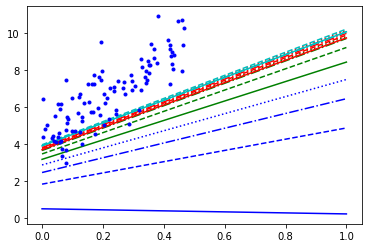

In [ ]:
 import random
m = len(X_b)
n_epochs = 50
t0, t1 = 5, 50
learning_schedule = lambda t: t0/(t+t1) # learning rate를 반복되는 학습 중간중간 바꾸기 위해 작성한 함수
theta = initial_theta
min_mse = 10000

minibatch_size = 20 # 미니 배치 사이즈를 지정
samples = list(zip(X_b,y))
t = 0

for epoch in range(n_epochs):
    for i in range(m):
      # if 절 안에 그래프를 그리는 코드 작성
      if epoch*m + i < len(color)*len(line):
        y_new_predict = X_new_b.dot(theta) # 현재 weight 기준 y의 예측값
        style = color[i//len(color)] + line[i%len(line)]
        plt.plot(X_new,y_new_predict,style)
      
      t += 1
      # Mini Batch 가 진행되는 부분
      mini_batch = random.sample(samples,minibatch_size)
      xi = np.array([data[0] for data in mini_batch])
      yi = np.array([data[1] for data in mini_batch])

      gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
      eta = learning_schedule(t)
      theta = theta - eta * gradients

    y_predict = X_b.dot(theta)
    err = y_predict - y
    mse = 1/m * err.T.dot(err)
    if mse < min_mse:
      min_mse = mse
    else:
      print(f'epoch={epoch} early stopping!! w/o mse={mse} min_mse={min_mse}')
      break # 학습 종료

      # Learning Rate를 매 학습마다 변화를 주기 위해 작성한 코드
plt.plot(X, y, "b.")
plt.show()